At first, we are importing the necessary Python packages.

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Let's download the iris dataset from its weblink as follows:

In [161]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Now, assign the column names to the dataset as follows:

In [162]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

Next, we have to read the dataset using the Pandas data frame as follows:

In [163]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

Now, observe the data.

In [164]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's implement the very basic step of data preprocessing.

In [165]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Here, we are dividing the data into train and test splits, with 70% of the training data and 30% of the testing data. Here we are making random_state=0 to keep the same train and test sets across different executions.

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Let's do the data scaling.

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Decision Tree**

Now, we are training the model with the help of the DecisionTreeClassifier class of sklearn as follows:

In [168]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Let us first test the accuracy of the Decision Tree classifier over the training dataset.

In [169]:
y_pred = classifier.predict(X_train)

In [170]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


We are getting 100% accuracy on the training dataset using the decision tree.

Now, we have to make the prediction on the test data, which can be done in the following way:

In [171]:
y_pred = classifier.predict(X_test)

Let's print the results as follows:

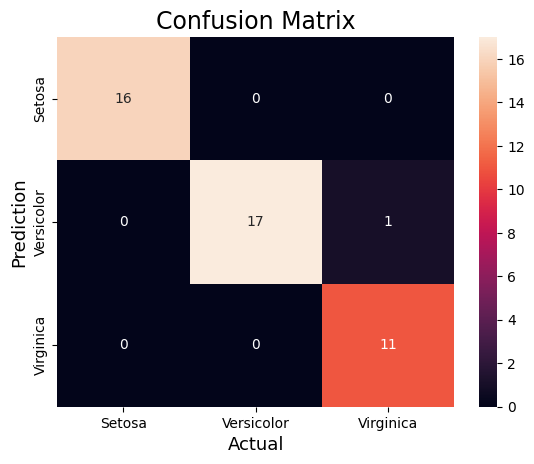

In [172]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Out of 16 Setosa, 16 Setosa have been correctly classified. Out of 18 Versicolor, 17 have been correctly classified as Versicolor, and 1 has been wrongly classified as Virginica. Out of 11 Virginica, 11 have been correctly classified as Virginica.

In [173]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


Using the Decision Tree classifier, we have achieved an accuracy of approximately 97.78% on the test dataset, which is also very good accuracy. Therefore, there are no underfitting or overfitting phenomena.

**Random Forest**

Now, let us try to improve the accuracy by training the model with the help of the RandomForestClassifier class of sklearn as follows, where the performances of 10 decision trees are combined:

In [174]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

Let us first test the accuracy of the Random Forest classifier over the training dataset.

In [175]:
y_pred = classifier.predict(X_train)

In [176]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9904761904761905


We are getting approximately 99.05% accuracy on the training dataset using the random forest where the results of 10 decision trees are combined.

Now, we have to make the prediction on the test data, which can be done in the following way:

In [177]:
y_pred = classifier.predict(X_test)

Let's print the results as follows:

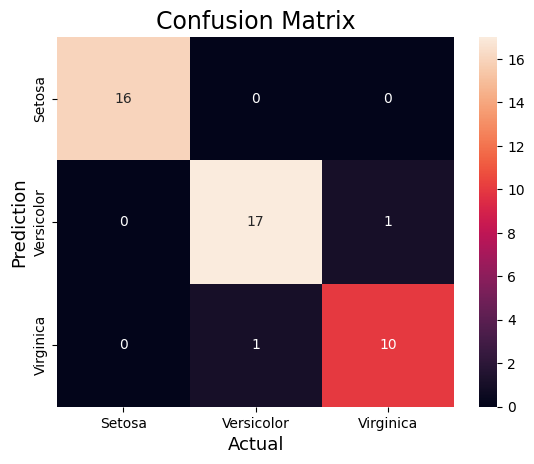

In [178]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Out of 16 Setosa, 16 Setosa have been correctly classified. Out of 18 Versicolor, 17 have been correctly classified as Versicolor and 1 has been wrongly classified as Virginica. Out of 11 Virginica, 10 have been correctly classified as Virginica and 1 has been wrongly classified as Versicolor.

In [179]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


We are getting approximately 95.56% accuracy on the test dataset using the random forest where the results of 10 decision trees are combined. The accuracy achieved on the test dataset is closer to the accuracy achieved on the training dataset. Therefore, there is no underfitting or overfitting scenario.

Now, let us test the accuracy by training the model with the help of the RandomForestClassifier class of sklearn as follows where the performances of 20 decision trees are combined:

In [180]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

Now, we have to make the prediction on the test data, which can be done in the following way:

In [181]:
y_pred = classifier.predict(X_test)

Let's print the results as follows:

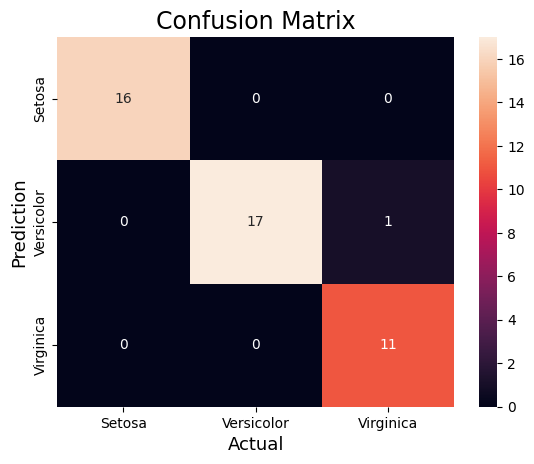

In [182]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Out of 16 Setosa, 16 Setosa have been correctly classified. Out of 18 Versicolor, 17 have been correctly classified as Versicolor, and 1 has been wrongly classified as Virginica. Out of 11 Virginica, 11 have been correctly classified as Virginica.

In [183]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


Here, we are also getting approximately 97.78% accuracy on the test dataset using the random forest, where the results of 20 decision trees are combined. We can see the improvement in accuracy while ensembling the number of decision trees.